## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   9.427321   936.727831  0.424471  7.287673  1.612003
1  44.417105   909.743759  0.691419  9.602666  1.459871
2  19.611842   260.340882  0.380650  3.144760  1.506625
3  76.309910   816.360388  0.179959  5.208160  1.158292
4  68.901189  1339.066806  0.650283  5.403474  1.518849


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0107772	total: 51.7ms	remaining: 51.6s
1:	learn: 1.0004631	total: 52.7ms	remaining: 26.3s
2:	learn: 0.9898316	total: 53.1ms	remaining: 17.7s
3:	learn: 0.9789734	total: 53.8ms	remaining: 13.4s
4:	learn: 0.9644561	total: 54.5ms	remaining: 10.8s
5:	learn: 0.9525931	total: 55.1ms	remaining: 9.13s
6:	learn: 0.9397429	total: 55.9ms	remaining: 7.92s
7:	learn: 0.9253371	total: 56.6ms	remaining: 7.02s
8:	learn: 0.9123976	total: 57.4ms	remaining: 6.32s
9:	learn: 0.8996891	total: 58.1ms	remaining: 5.75s
10:	learn: 0.8909479	total: 58.9ms	remaining: 5.3s
11:	learn: 0.8798704	total: 59.7ms	remaining: 4.91s
12:	learn: 0.8672113	total: 60.4ms	remaining: 4.59s
13:	learn: 0.8560807	total: 61.3ms	remaining: 4.31s
14:	learn: 0.8444723	total: 62ms	remaining: 4.07s
15:	learn: 0.8334847	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8224985	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8109129	total: 68ms	remaining: 3.71s
18:	learn: 0.8022341	total: 75.1ms	remaining: 3.88s
19:	learn: 0.7903636	total:

126:	learn: 0.2731570	total: 157ms	remaining: 1.08s
127:	learn: 0.2713112	total: 158ms	remaining: 1.07s
128:	learn: 0.2694591	total: 159ms	remaining: 1.07s
129:	learn: 0.2680527	total: 160ms	remaining: 1.07s
130:	learn: 0.2660062	total: 160ms	remaining: 1.06s
131:	learn: 0.2644956	total: 161ms	remaining: 1.06s
132:	learn: 0.2625814	total: 161ms	remaining: 1.05s
133:	learn: 0.2609252	total: 162ms	remaining: 1.05s
134:	learn: 0.2590420	total: 162ms	remaining: 1.04s
135:	learn: 0.2578275	total: 163ms	remaining: 1.04s
136:	learn: 0.2560850	total: 164ms	remaining: 1.03s
137:	learn: 0.2542927	total: 165ms	remaining: 1.03s
138:	learn: 0.2527190	total: 165ms	remaining: 1.02s
139:	learn: 0.2509084	total: 166ms	remaining: 1.02s
140:	learn: 0.2496353	total: 167ms	remaining: 1.01s
141:	learn: 0.2474386	total: 167ms	remaining: 1.01s
142:	learn: 0.2460576	total: 168ms	remaining: 1.01s
143:	learn: 0.2443267	total: 169ms	remaining: 1s
144:	learn: 0.2429901	total: 169ms	remaining: 999ms
145:	learn: 0.2

190:	learn: 0.1878045	total: 199ms	remaining: 843ms
191:	learn: 0.1871116	total: 200ms	remaining: 843ms
192:	learn: 0.1858887	total: 201ms	remaining: 841ms
193:	learn: 0.1849336	total: 202ms	remaining: 840ms
194:	learn: 0.1841640	total: 203ms	remaining: 839ms
195:	learn: 0.1832358	total: 204ms	remaining: 836ms
196:	learn: 0.1822440	total: 204ms	remaining: 833ms
197:	learn: 0.1813513	total: 205ms	remaining: 830ms
198:	learn: 0.1804703	total: 206ms	remaining: 827ms
199:	learn: 0.1793812	total: 206ms	remaining: 825ms
200:	learn: 0.1784081	total: 207ms	remaining: 822ms
201:	learn: 0.1776788	total: 207ms	remaining: 819ms
202:	learn: 0.1768803	total: 208ms	remaining: 816ms
203:	learn: 0.1764863	total: 208ms	remaining: 812ms
204:	learn: 0.1757379	total: 209ms	remaining: 809ms
205:	learn: 0.1746220	total: 210ms	remaining: 808ms
206:	learn: 0.1737952	total: 210ms	remaining: 805ms
207:	learn: 0.1733191	total: 211ms	remaining: 803ms
208:	learn: 0.1725962	total: 211ms	remaining: 800ms
209:	learn: 

356:	learn: 0.1060359	total: 312ms	remaining: 563ms
357:	learn: 0.1059235	total: 313ms	remaining: 562ms
358:	learn: 0.1056163	total: 314ms	remaining: 560ms
359:	learn: 0.1054740	total: 315ms	remaining: 559ms
360:	learn: 0.1048951	total: 315ms	remaining: 558ms
361:	learn: 0.1043289	total: 316ms	remaining: 556ms
362:	learn: 0.1039404	total: 316ms	remaining: 555ms
363:	learn: 0.1038104	total: 317ms	remaining: 554ms
364:	learn: 0.1036730	total: 318ms	remaining: 553ms
365:	learn: 0.1035472	total: 319ms	remaining: 552ms
366:	learn: 0.1029933	total: 320ms	remaining: 551ms
367:	learn: 0.1024516	total: 321ms	remaining: 551ms
368:	learn: 0.1020761	total: 322ms	remaining: 550ms
369:	learn: 0.1019525	total: 322ms	remaining: 549ms
370:	learn: 0.1018310	total: 323ms	remaining: 548ms
371:	learn: 0.1017022	total: 324ms	remaining: 546ms
372:	learn: 0.1015847	total: 324ms	remaining: 545ms
373:	learn: 0.1011468	total: 324ms	remaining: 543ms
374:	learn: 0.1010227	total: 326ms	remaining: 543ms
375:	learn: 

418:	learn: 0.0867991	total: 357ms	remaining: 495ms
419:	learn: 0.0867108	total: 358ms	remaining: 494ms
420:	learn: 0.0863993	total: 359ms	remaining: 494ms
421:	learn: 0.0861585	total: 360ms	remaining: 493ms
422:	learn: 0.0858540	total: 361ms	remaining: 492ms
423:	learn: 0.0857588	total: 361ms	remaining: 490ms
424:	learn: 0.0856651	total: 361ms	remaining: 489ms
425:	learn: 0.0853660	total: 362ms	remaining: 488ms
426:	learn: 0.0852738	total: 363ms	remaining: 487ms
427:	learn: 0.0849799	total: 363ms	remaining: 486ms
428:	learn: 0.0848893	total: 364ms	remaining: 484ms
429:	learn: 0.0845376	total: 364ms	remaining: 483ms
430:	learn: 0.0844487	total: 365ms	remaining: 482ms
431:	learn: 0.0841607	total: 366ms	remaining: 481ms
432:	learn: 0.0840733	total: 367ms	remaining: 480ms
433:	learn: 0.0836966	total: 367ms	remaining: 479ms
434:	learn: 0.0833864	total: 368ms	remaining: 478ms
435:	learn: 0.0833011	total: 368ms	remaining: 476ms
436:	learn: 0.0829678	total: 369ms	remaining: 475ms
437:	learn: 

589:	learn: 0.0513256	total: 470ms	remaining: 327ms
590:	learn: 0.0511419	total: 472ms	remaining: 327ms
591:	learn: 0.0510850	total: 473ms	remaining: 326ms
592:	learn: 0.0509287	total: 474ms	remaining: 325ms
593:	learn: 0.0508727	total: 475ms	remaining: 324ms
594:	learn: 0.0506602	total: 475ms	remaining: 324ms
595:	learn: 0.0505081	total: 476ms	remaining: 323ms
596:	learn: 0.0503928	total: 477ms	remaining: 322ms
597:	learn: 0.0502434	total: 478ms	remaining: 321ms
598:	learn: 0.0501296	total: 478ms	remaining: 320ms
599:	learn: 0.0498695	total: 479ms	remaining: 319ms
600:	learn: 0.0497595	total: 480ms	remaining: 318ms
601:	learn: 0.0497008	total: 480ms	remaining: 318ms
602:	learn: 0.0494382	total: 481ms	remaining: 317ms
603:	learn: 0.0492931	total: 481ms	remaining: 316ms
604:	learn: 0.0490609	total: 482ms	remaining: 315ms
605:	learn: 0.0488614	total: 483ms	remaining: 314ms
606:	learn: 0.0487205	total: 483ms	remaining: 313ms
607:	learn: 0.0486104	total: 484ms	remaining: 312ms
608:	learn: 

654:	learn: 0.0428806	total: 516ms	remaining: 272ms
655:	learn: 0.0427781	total: 517ms	remaining: 271ms
656:	learn: 0.0426794	total: 518ms	remaining: 270ms
657:	learn: 0.0426484	total: 519ms	remaining: 270ms
658:	learn: 0.0425416	total: 519ms	remaining: 269ms
659:	learn: 0.0425110	total: 520ms	remaining: 268ms
660:	learn: 0.0424305	total: 521ms	remaining: 267ms
661:	learn: 0.0424003	total: 521ms	remaining: 266ms
662:	learn: 0.0422775	total: 522ms	remaining: 265ms
663:	learn: 0.0421927	total: 523ms	remaining: 265ms
664:	learn: 0.0420925	total: 524ms	remaining: 264ms
665:	learn: 0.0419966	total: 524ms	remaining: 263ms
666:	learn: 0.0419669	total: 525ms	remaining: 262ms
667:	learn: 0.0419375	total: 526ms	remaining: 261ms
668:	learn: 0.0418176	total: 526ms	remaining: 260ms
669:	learn: 0.0417347	total: 527ms	remaining: 259ms
670:	learn: 0.0416593	total: 527ms	remaining: 259ms
671:	learn: 0.0415613	total: 528ms	remaining: 258ms
672:	learn: 0.0415323	total: 529ms	remaining: 257ms
673:	learn: 

801:	learn: 0.0307808	total: 630ms	remaining: 156ms
802:	learn: 0.0307360	total: 632ms	remaining: 155ms
803:	learn: 0.0306741	total: 633ms	remaining: 154ms
804:	learn: 0.0306511	total: 634ms	remaining: 154ms
805:	learn: 0.0304974	total: 635ms	remaining: 153ms
806:	learn: 0.0304746	total: 636ms	remaining: 152ms
807:	learn: 0.0304097	total: 637ms	remaining: 151ms
808:	learn: 0.0303871	total: 639ms	remaining: 151ms
809:	learn: 0.0302802	total: 641ms	remaining: 150ms
810:	learn: 0.0302398	total: 642ms	remaining: 150ms
811:	learn: 0.0302174	total: 643ms	remaining: 149ms
812:	learn: 0.0301591	total: 644ms	remaining: 148ms
813:	learn: 0.0300182	total: 645ms	remaining: 147ms
814:	learn: 0.0299760	total: 646ms	remaining: 147ms
815:	learn: 0.0299133	total: 647ms	remaining: 146ms
816:	learn: 0.0298410	total: 648ms	remaining: 145ms
817:	learn: 0.0297377	total: 648ms	remaining: 144ms
818:	learn: 0.0296770	total: 649ms	remaining: 143ms
819:	learn: 0.0296551	total: 649ms	remaining: 143ms
820:	learn: 

843:	learn: 0.0281691	total: 673ms	remaining: 124ms
844:	learn: 0.0280986	total: 675ms	remaining: 124ms
845:	learn: 0.0280345	total: 676ms	remaining: 123ms
846:	learn: 0.0279720	total: 677ms	remaining: 122ms
847:	learn: 0.0278762	total: 678ms	remaining: 122ms
848:	learn: 0.0277934	total: 680ms	remaining: 121ms
849:	learn: 0.0277725	total: 681ms	remaining: 120ms
850:	learn: 0.0277520	total: 682ms	remaining: 119ms
851:	learn: 0.0276844	total: 683ms	remaining: 119ms
852:	learn: 0.0276160	total: 684ms	remaining: 118ms
853:	learn: 0.0275467	total: 684ms	remaining: 117ms
854:	learn: 0.0274795	total: 685ms	remaining: 116ms
855:	learn: 0.0274191	total: 686ms	remaining: 115ms
856:	learn: 0.0273601	total: 686ms	remaining: 115ms
857:	learn: 0.0272759	total: 687ms	remaining: 114ms
858:	learn: 0.0272081	total: 688ms	remaining: 113ms
859:	learn: 0.0271420	total: 688ms	remaining: 112ms
860:	learn: 0.0270719	total: 689ms	remaining: 111ms
861:	learn: 0.0270174	total: 690ms	remaining: 110ms
862:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2995147371851798


ABC Pre-generator MAE 0.2966483547173741


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

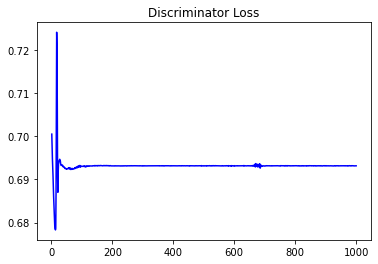

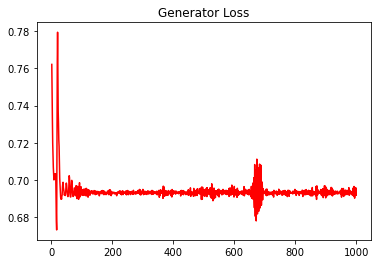

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3164028952382505


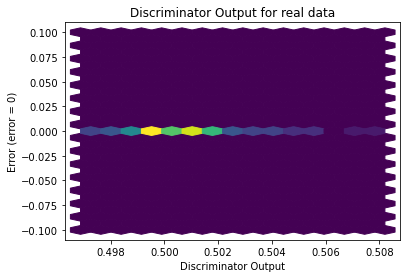

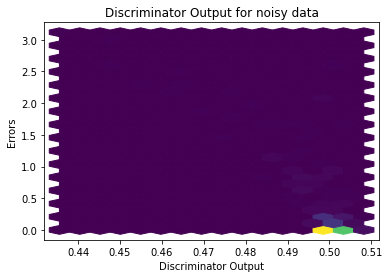

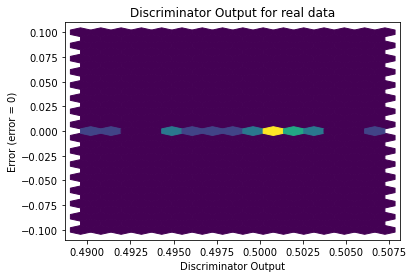

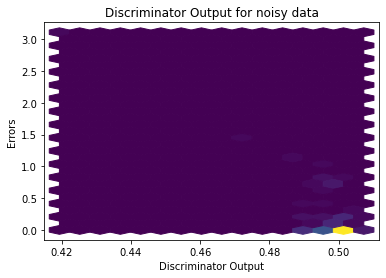

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

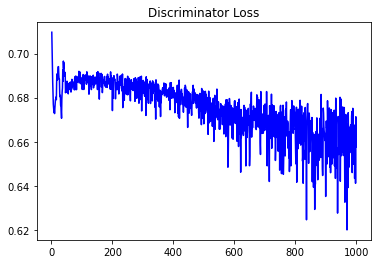

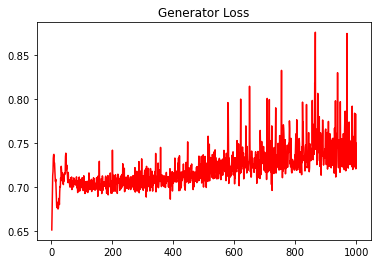

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.42264704481512305


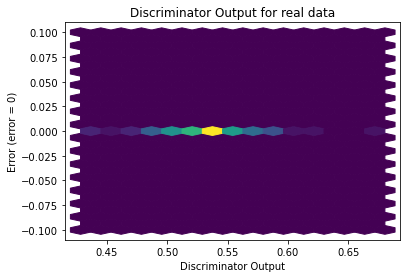

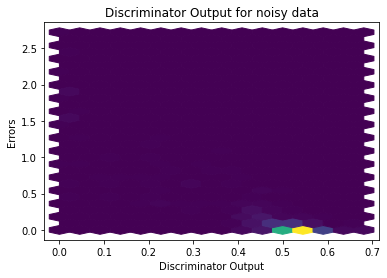

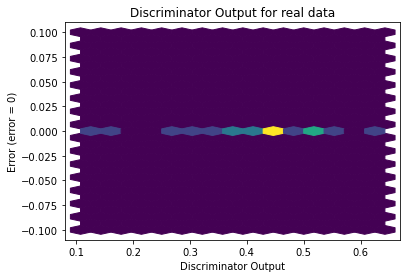

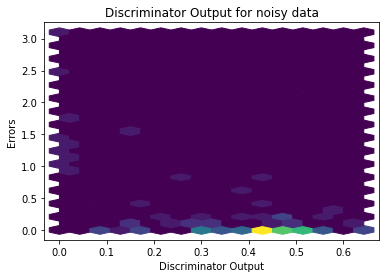

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


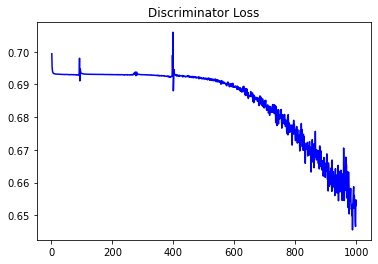

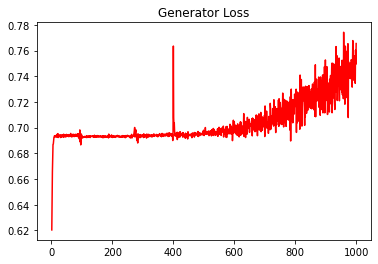

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.2983441795818508


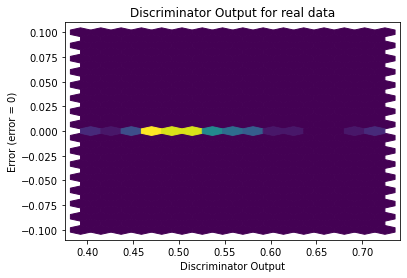

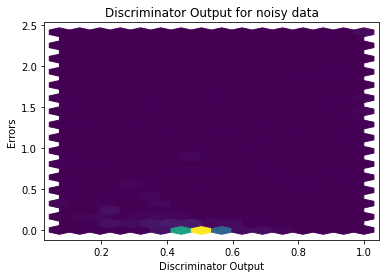

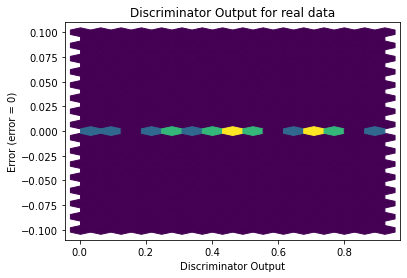

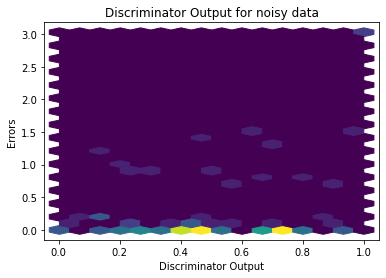

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


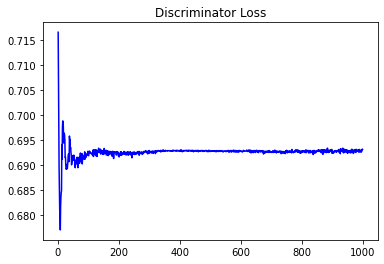

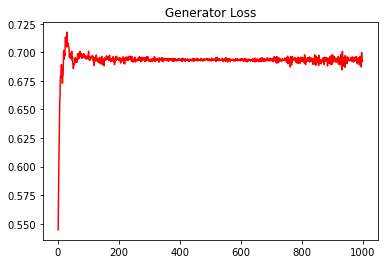

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2989182050004601


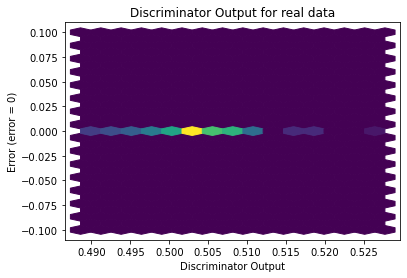

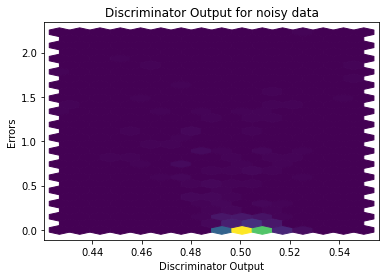

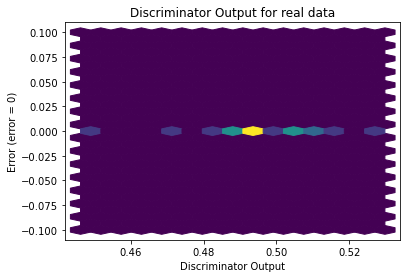

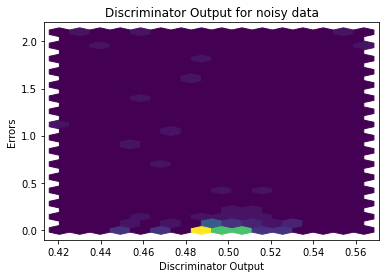

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0631]], requires_grad=True)
